<a href="https://colab.research.google.com/github/GuhNasc/Data-Science/blob/main/Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - New York

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de New York , e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York
 (good for visualisations).*

In [ ]:
#Importando as bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
## importando o dataframe
df = pd.read_csv('/content/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome das cidades que está localizada a propriedade
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


### 1-) Quantas váriaveis e entradas contém nosso conjunto de dados ? Quais os tipos dessas váriaveis ?

In [ ]:
# Utilizando o metodo info podemos verificar a quantidade de entradas e os tipos de cada variavel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36923 non-null  int64  
 1   name                            36910 non-null  object 
 2   host_id                         36923 non-null  int64  
 3   host_name                       36914 non-null  object 
 4   neighbourhood_group             36923 non-null  object 
 5   neighbourhood                   36923 non-null  object 
 6   latitude                        36923 non-null  float64
 7   longitude                       36923 non-null  float64
 8   room_type                       36923 non-null  object 
 9   price                           36923 non-null  int64  
 10  minimum_nights                  36923 non-null  int64  
 11  number_of_reviews               36923 non-null  int64  
 12  last_review                     

Entradas de dados : 36923
Váriaveis : 16

### 2-) Qual a porcentagem de valores ausentes no dataset ?

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# Verificando a porcentagem dos valores ausentes de cada váriavel 
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* As variaveis `reviews_per_month` e `last_review` não contém 100% dos valores válidos

### 3-) Qual a distribuição das váriaveis númericas ?

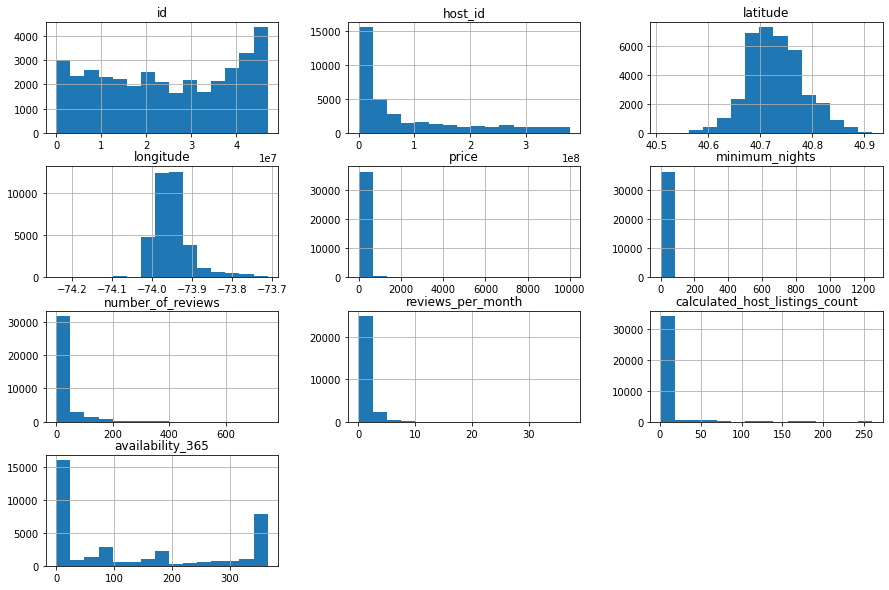

In [ ]:
# Plotando um histograma de cada variavel númerica
df.hist(bins=15, figsize=(15,10))
plt.show()

### 4-) Há outliers presentes ?

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# Ver resumo estátistico das váriaveis numericas 

df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36923.000000,36923.000000,36923.000000,27539.000000,36923.000000,36923.000000
mean,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,268.388200,26.779132,48.066110,1.305804,31.080929,147.640898
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.370000,1.000000,77.000000
75%,159.000000,30.000000,21.000000,1.170000,2.000000,313.000000
max,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 159, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

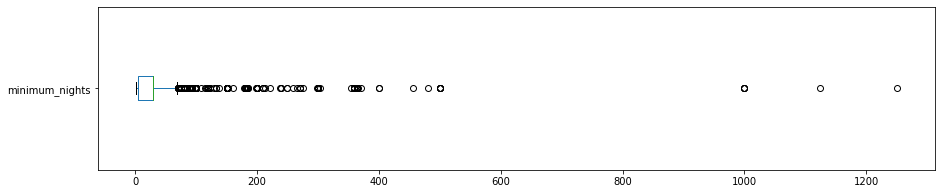

minimum_nights: valores acima de 30:
1172 entradas
3.1742%


In [ ]:
# minimum_nights
df['minimum_nights'].plot(kind='box', vert=False ,figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

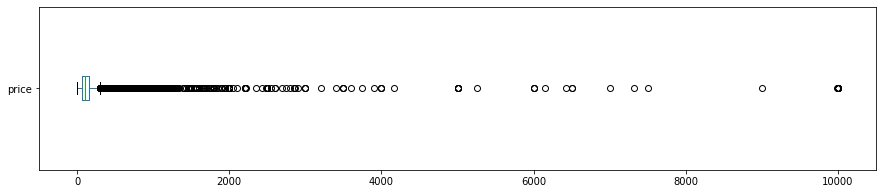

price: valores acima de 2500:
51 entradas
0.1381%


In [ ]:
# price
df['price'].plot(kind='box', vert=False ,figsize=(15,3),)
plt.show()

# Ver quantidade de valores acima de 2500R$ para price
print('price: valores acima de 2500:')
print('{} entradas'.format(len(df[df.price > 2500])))
print('{:.4f}%'.format((len(df[df.price > 2500]) / df.shape[0])*100))

#### Histograma sem outliers 
Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

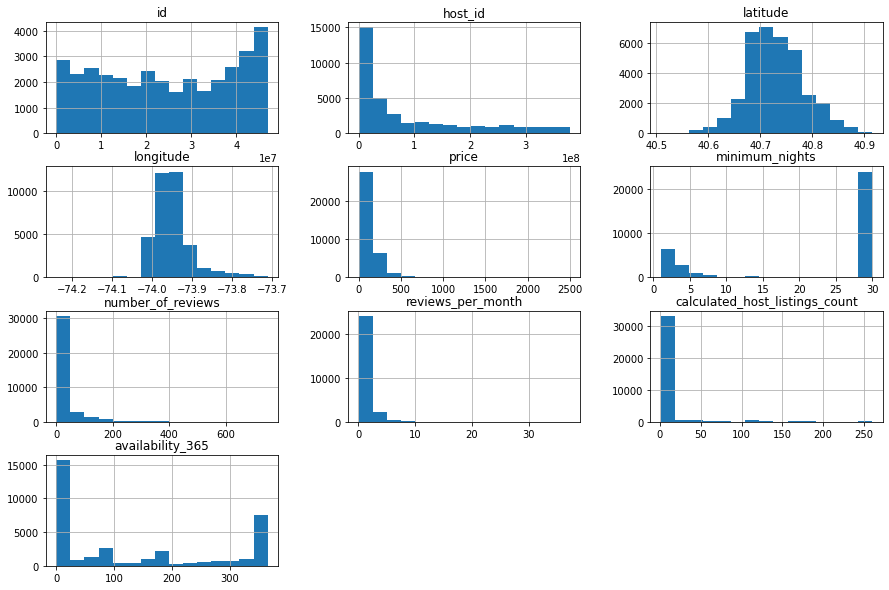

In [ ]:
# hisotrama sem outliers 
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 2500].index , axis=0, inplace= True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index , axis = 0, inplace= True)

# plotar histograma para váriaveis numericas 
df_limpo.hist(bins=15 , figsize=(15,10));

### 4.1 Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
## criar uma matriz de correlação
corr = df_limpo[['price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count',]].corr()

display(corr)

,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count
price,1.000000,-0.012004,-0.048871,-0.051412,-0.015849
minimum_nights,-0.012004,1.000000,-0.377594,-0.242395,0.123161
reviews_per_month,-0.048871,-0.377594,1.000000,0.704229,-0.060477
number_of_reviews,-0.051412,-0.242395,0.704229,1.000000,-0.100014
calculated_host_listings_count,-0.015849,0.123161,-0.060477,-0.100014,1.000000


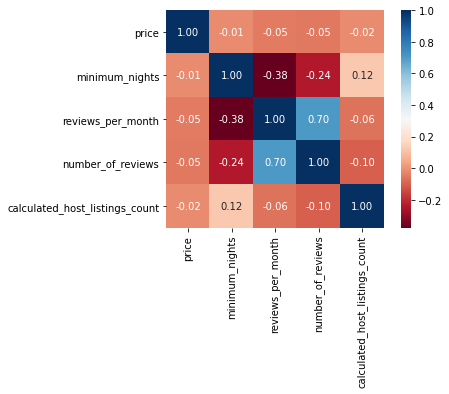

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True,linecolor='white',annot=True);

### 5-). Qual o tipo de imóvel mais alugado no Airbnb?

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# Mostrar a quantidade de cada tipo de quarto
df_limpo['room_type'].value_counts()

Entire home/apt    18643
Private room       16113
Shared room          658
Hotel room           296
Name: room_type, dtype: int64

In [ ]:
# Mostrar a porcentagem de cada quarto
df_limpo['room_type'].value_counts() /df_limpo.shape[0]

Entire home/apt    0.522067
Private room       0.451218
Shared room        0.018426
Hotel room         0.008289
Name: room_type, dtype: float64

### 6-). Qual a localidade mais cara de New York?

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
## Mostrar a localidade mais cara de New York
df_limpo.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        171.603093
Brooklyn         117.157444
Staten Island    108.424908
Queens            96.432205
Bronx             90.900109
Name: price, dtype: float64

In [ ]:
# Ver a quantidade de imóveis em Manhatttan
print(df_limpo[df_limpo.neighbourhood_group == 'Manhattan'].shape)

# ver as entradas em Manhattan
df_limpo[df_limpo.neighbourhood_group == 'Manhattan']

In [ ]:
# Ver a quantidade de imóveis em Brooklyn
print(df_limpo[df_limpo.neighbourhood_group == 'Brooklyn'].shape)

# ver as entradas em Brooklyn
df_limpo[df_limpo.neighbourhood_group == 'Brooklyn']

In [ ]:
# Ver a quantidade de imóveis em Staten Island 
print(df_limpo[df_limpo.neighbourhood_group == 'Staten Island'].shape)

# ver as entradas em Staten Island 
df_limpo[df_limpo.neighbourhood_group == 'Staten Island']

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

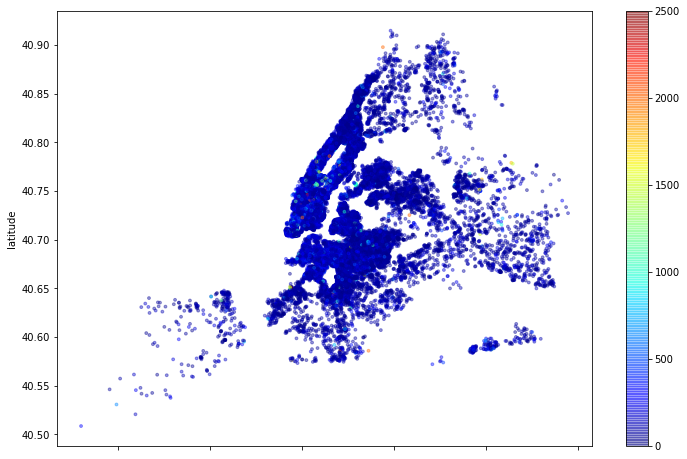

In [ ]:
# plotando imoveis com longitude e latitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

De acordo com essa breve análise nos dados do Airbnb podemos perceber que há outliers presentes em algumas váriaveis.

Nota-se que as distribuições das localidades dos imóveis estão bem distribuidas , o que não distorce as informações estátisticas de algumas váriaveis  

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.